In [3]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [4]:
def compute_accuracy_metrics(df):
    """
    Computes accuracy metrics
    """
    ground_truth = df.iloc[:, 0].to_numpy()  
    iterations = df.iloc[:, 1:]  
    accuracy_scores = (iterations == ground_truth[:, None]).mean(axis=0)
    summary_df = pd.DataFrame({
        'Accuracy': accuracy_scores.round(3) 
    })
    return summary_df.iloc[4::5]

def accuracy(dataset):
    """
    Calculates accuracy
    """
    ground_truth = dataset['ground_truth']
    nr_total = dataset.shape[0]
    nr_true = (dataset.iloc[:, -1] == ground_truth).sum()
    accuracy = nr_true / nr_total
    print(accuracy)
    return(accuracy)

def per_group_acc(dataset):
    """
    Computes accuracy metrics per group
    """
    accuracy = []
    group_labels = []  
    for group in dataset['ground_truth'].unique():
        gr = dataset[dataset['ground_truth'] == group]
        ground_truth = gr.iloc[:, 0].to_numpy()  
        iterations = gr.iloc[:, 1:].to_numpy()   
        accuracy_scores = (iterations == ground_truth[:, None]).mean(axis=0)
        accuracy.append(accuracy_scores)
        group_labels.append(f"G{group + 1}") 
    accuracy_df = pd.DataFrame(accuracy, index=group_labels, columns=[f"Iter {i+1}" for i in range(iterations.shape[1])]).round(3)
    return accuracy_df.T[4::5]

def accuracy_per_iteration(dataset):
    """
    Computes accuracy metrics per iteration
    """
    ground_truth = dataset['ground_truth'].to_numpy() 
    accuracy = (dataset.iloc[:, 1:].to_numpy() == ground_truth[:, None]).mean(axis=0)
    print(accuracy) 
    return accuracy  

In [31]:
def figure1(dataset, path = None, name = None):
    """
    Barplot of the accuracy per group for one dataset
    """
    accuracy = []
    for group in dataset['ground_truth'].unique():
        gr = dataset[dataset['ground_truth'] == group]
        nr_total = gr.shape[0]
        if nr_total == 0: 
            accuracy.append(0)
            continue
        nr_true = (gr.iloc[:, -1] == group).sum()  
        accuracy.append(nr_true / nr_total)
    print(accuracy)
    groups = range(len(accuracy))
    groups = [x + 1 for x in groups]
    plt.bar(groups, accuracy)
    plt.xlabel('Group')
    plt.ylabel('Accuracy')
    plt.title('Accuracy by Group')
    if path is not None:
        plt.savefig(f"{path}/figure1_{name}.png")
    else:
        plt.show()
    plt.close()

def figure2(dataset, group, path = None, name = None):
    """
    Probabilty progression for each group
    """
    dataset_group = dataset[dataset['ground_truth'] == group]
    nr_total = dataset_group.shape[0]
    probs = []
    for gr in range(len(dataset['ground_truth'].unique())):
        prob = []
        for iter in range(1, 11):
            nr_true = ((dataset_group.iloc[:, iter:iter + 1]) == gr).sum() 
            prob.append((nr_true / nr_total).values[0]) 
        probs.append(prob)
    probs = np.array(probs)
    #print(probs)
    plt.figure(figsize=(12, 6))
    for i in range(probs.shape[0]):
        plt.plot(range(probs.shape[1]), probs[i], label=f'Group {i+1}', marker = 'o')
    plt.xticks(range(probs.shape[1]), range(1, probs.shape[1] + 1))
    #plt.title("Probability Progression by Group")
    plt.title(f"Evolution of probabilities vs number of items for group {group+1}", fontsize=15)
    plt.xlabel("Iteration", fontsize=15)
    plt.ylabel("Probability", fontsize=15)
    plt.legend()
    plt.grid(True)
    if path is not None:
        plt.savefig(f"{path}/figure2_{name}.png")
    else:
        plt.show()
    plt.close()

def figure3(dataset_without, dataset_rollout, path = None, name = None):
    """
    Lineplot to see dofference between code with and without rollouts
    """
    acc_without = []
    nr_total_without = dataset_without.shape[0]
    acc_rollout = []
    nr_total_rollout = dataset_rollout.shape[0]
    for iter in range(1, dataset_without.shape[1]):
        correct_without = dataset_without['ground_truth'] == dataset_without.iloc[:, iter]
        acc_without.append(correct_without.sum()/nr_total_without)
    for iter in range(1, dataset_rollout.shape[1]):
        correct_rollout = dataset_rollout['ground_truth'] == dataset_rollout.iloc[:, iter]
        acc_rollout.append(correct_rollout.sum() / nr_total_rollout)
    plt.figure(figsize=(10, 6))
    plt.plot(range(0, 11), acc_without[:11], label='Without rollback')
    plt.plot(range(0, 11), acc_rollout[:11], label='With rollback')
    plt.title("Group Estimation Accuracy per Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Probability")
    plt.legend()
    plt.grid(True)
    if path is not None:
        plt.savefig(f"{path}/figure3_{name}.png")
    else:
        plt.show()
    plt.close()  

def figure4(dataset_MCT, dataset_DT, path = None, name = None):
    """
    Accuracy by iteration
    """
    acc_MCT = []
    nr_total_MCT = dataset_MCT.shape[0]
    acc_DT = []
    nr_total_DT = dataset_DT.shape[0]
    for iter in range(1, dataset_MCT.shape[1]):
        correct_without = dataset_MCT['ground_truth'] == dataset_MCT.iloc[:, iter]
        acc_MCT.append(correct_without.sum()/nr_total_MCT)
    for iter in range(1, dataset_DT.shape[1]):
        correct_rollout = dataset_DT['ground_truth'] == dataset_DT.iloc[:, iter]
        acc_DT.append(correct_rollout.sum() / nr_total_DT)
    plt.figure(figsize=(10, 6))
    plt.plot(range(0, 11), acc_MCT[:11], label='MCT')
    plt.plot(range(0, 11), acc_DT[:11], label='DT')
    plt.title("Group Estimation Accuracy by Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Probability")
    plt.legend()
    plt.grid(True)
    if path is not None:
        plt.savefig(f"{path}/figure4_{name}.png")
    else:
        plt.show()
    plt.close()

def figure5(dataset_MCT, dataset_DT, path = None, name = None):
    """
    Barplot for accuracy per group for DT and MCDT
    """
    accuracy_MCT = []
    accuracy_DT = []
    for group in range(0, len(dataset_MCT['ground_truth'].unique())):
        gr_MCT = dataset_MCT[dataset_MCT['ground_truth'] == group]
        nr_total = gr_MCT.shape[0]
        nr_true = ((gr_MCT.iloc[:, -1:]) == group).sum()
        accuracy_MCT.append((nr_true / nr_total).values[0])
    print(accuracy_MCT)
    for group in dataset_MCT['ground_truth'].unique():  
        dt_group = dataset_DT[dataset_DT['ground_truth'] == (group + 1)]
        if dt_group.empty: 
            accuracy_DT.append(np.nan)
        else:
            nr_total = dt_group.shape[0]
            nr_true = (dt_group.iloc[:, -1] == (group + 1)).sum()
            accuracy_DT.append(nr_true / nr_total if nr_total > 0 else np.nan)
    print(accuracy_DT)
    categories = range(1, len(dataset_MCT['ground_truth'].unique())+1)
    n_groups = len(categories)
    bar_width = 0.2
    x = np.arange(n_groups)
    x2 = x + bar_width
    plt.figure(figsize=(10, 6))
    plt.bar(x, accuracy_MCT, width=bar_width, label='MCT', color='b')
    plt.bar(x2, accuracy_DT, width=bar_width, label='DT', color='g')
    plt.title("Probability Progression by Group")
    plt.xlabel("Group")
    plt.ylabel("Probability")
    plt.xticks(x + bar_width, categories)  
    plt.legend(loc='lower right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    if path is not None:
        plt.savefig(f"{path}/figure5_{name}.png")
    else:
        plt.show()
    plt.close()

def figure6(ds4_ours, ds4_authors, ds8_ours, ds8_authors, ds16_our, ds16_authors, ds32_ours, ds32_authors, title, name, path):
    """
    Comparison of Our implementation accuracy to the one of the authorsfor all datsets
    """
    iterations_ds4_ours = np.arange(1, 26)  
    iterations_ds8_ours = np.arange(1, 26)  
    iterations_ds16_ours = np.arange(1, 26)  
    iterations_ds32_ours = np.arange(1, 26)  
    iterations_ds4_authors = np.array([5, 10, 15, 20, 25])  
    iterations_ds8_authors = np.array([5, 10, 15, 20, 25])  
    iterations_ds16_authors = np.array([5, 10, 15, 20, 25])  
    iterations_ds32_authors = np.array([5, 10, 15, 20, 25])  
    plt.figure(figsize=(8, 5))
    plt.plot(iterations_ds4_ours, ds4_ours, label="4 groups: our implementation", linestyle='-', marker='o', color='blue')
    plt.plot(iterations_ds4_authors, ds4_authors, label="4 groups: authors implementation", linestyle='--', marker='s', color='blue')
    plt.plot(iterations_ds8_ours, ds8_ours, label="8 groups: our implementation", linestyle='-', marker='o', color='red')
    plt.plot(iterations_ds8_authors, ds8_authors, label="8 groups: authors implementation", linestyle='--', marker='s', color='red')
    plt.plot(iterations_ds16_ours, ds16_our, label="16 groups: our implementation", linestyle='-', marker='o', color='green')
    plt.plot(iterations_ds16_authors, ds16_authors, label="16 groups: authors implementation", linestyle='--', marker='s', color='green')
    plt.plot(iterations_ds32_ours, ds32_ours, label="32 groups: our implementation", linestyle='-', marker='o', color='orange')
    plt.plot(iterations_ds32_authors, ds32_authors, label="32 groups: authors implementation", linestyle='--', marker='s', color='orange')
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.title(title)
    plt.xticks([5, 10, 15, 20, 25])  
    plt.legend()
    plt.grid(True)
    if path is not None:
        plt.savefig(f"{path}/figure6_{name}.png")
    else:
        plt.show()
    plt.close()

def plot_accuracy_by_iteration(dataset1, dataset2, dataset3, labels=None, path=None, name=None):
    """
    Computes and plots accuracy by iteration for three datasets
    """
    datasets = [dataset1, dataset2, dataset3]
    colors = ['b', 'g', 'r'] 
    if labels is None:
        labels = ['Dataset 1', 'Dataset 2', 'Dataset 3']
    plt.figure(figsize=(10, 6))
    for i, dataset in enumerate(datasets):
        ground_truth = dataset['ground_truth'].to_numpy()
        accuracy = (dataset.iloc[:, 1:].to_numpy() == ground_truth[:, None]).mean(axis=0)
        for j in range(1, len(accuracy)):
            if accuracy[j] < accuracy[j - 1]: 
                accuracy[j] = accuracy[j - 1]
        plt.plot(range(1, len(accuracy) + 1), accuracy, label=labels[i], color=colors[i], marker='o')
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Progression by Iteration")
    plt.xticks([5, 10, 15, 20, 25])
    plt.legend()
    plt.grid(True)
    if path is not None and name is not None:
        plt.savefig(f"{path}/accuracy_plot_{name}.png")
    else:
        plt.show()
    plt.close()

In [6]:
os.chdir("path")

### Datasets with 100 users per group for different seeds ###
goodreads4_100_88666223 = pd.read_csv('88666223_100/goodreads4.csv', sep=",")
goodreads8_100_88666223  = pd.read_csv('88666223_100/goodreads8.csv', sep=",")
jester4_100_88666223  = pd.read_csv('88666223_100/jester4.csv', sep=",")
jester8_100_88666223  = pd.read_csv('88666223_100/jester8.csv', sep=",")
netflix4_100_88666223  = pd.read_csv('88666223_100/netflix4.csv', sep=",")
netflix8_100_88666223  = pd.read_csv('88666223_100/netflix8.csv', sep=",")

goodreads4_100_73308559 = pd.read_csv('73308559_100/goodreads4.csv', sep=",") 
goodreads8_100_73308559 = pd.read_csv('73308559_100/goodreads8.csv', sep=",") 
jester4_100_73308559 = pd.read_csv('73308559_100/jester4.csv', sep=",") 
jester8_100_73308559 = pd.read_csv('73308559_100/jester8.csv', sep=",") 
netflix4_100_73308559 = pd.read_csv('73308559_100/netflix4.csv', sep=",") 
netflix8_100_73308559 = pd.read_csv('73308559_100/netflix8.csv', sep=",")

goodreads4_100_63381133 = pd.read_csv('63381133_100/goodreads4.csv', sep=",") 
goodreads8_100_63381133 = pd.read_csv('63381133_100/goodreads8.csv', sep=",") 
jester4_100_63381133 = pd.read_csv('63381133_100/jester4.csv', sep=",") 
jester8_100_63381133 = pd.read_csv('63381133_100/jester8.csv', sep=",") 
netflix4_100_63381133 = pd.read_csv('63381133_100/netflix4.csv', sep=",") 
netflix8_100_63381133 = pd.read_csv('63381133_100/netflix8.csv', sep=",")

goodreads4_100_61451749 = pd.read_csv('61451749_100/goodreads4.csv', sep=",") 
goodreads8_100_61451749 = pd.read_csv('61451749_100/goodreads8.csv', sep=",")
goodreads16_100_61451749  = pd.read_csv('61451749_100/goodreads16.csv', sep=",") 
goodreads24_100_61451749  = pd.read_csv('61451749_100/goodreads24.csv', sep=",")
jester4_100_61451749 = pd.read_csv('61451749_100/jester4.csv', sep=",") 
jester8_100_61451749 = pd.read_csv('61451749_100/jester8.csv', sep=",") 
jester16_100_61451749  = pd.read_csv('61451749_100/jester16.csv', sep=",")
jester32_100_61451749  = pd.read_csv('61451749_100/jester32.csv', sep=",")
netflix4_100_61451749 = pd.read_csv('61451749_100/netflix4.csv', sep=",") 
netflix8_100_61451749 = pd.read_csv('61451749_100/netflix8.csv', sep=",")
netflix16_100_61451749  = pd.read_csv('61451749_100/netflix16.csv', sep=",")

goodreads4_100_45755797 = pd.read_csv('45755797_100/goodreads4.csv', sep=",") 
goodreads8_100_45755797 = pd.read_csv('45755797_100/goodreads8.csv', sep=",") 
jester4_100_45755797 = pd.read_csv('45755797_100/jester4.csv', sep=",") 
jester8_100_45755797 = pd.read_csv('45755797_100/jester8.csv', sep=",") 
netflix4_100_45755797 = pd.read_csv('45755797_100/netflix4.csv', sep=",") 
netflix8_100_45755797 = pd.read_csv('45755797_100/netflix8.csv', sep=",")

goodreads4_100_93643757 = pd.read_csv('93643757_100/goodreads4.csv', sep=",") 
goodreads8_100_93643757 = pd.read_csv('93643757_100/goodreads8.csv', sep=",") 
jester4_100_93643757 = pd.read_csv('93643757_100/jester4.csv', sep=",") 
jester8_100_93643757 = pd.read_csv('93643757_100/jester8.csv', sep=",") 
netflix4_100_93643757 = pd.read_csv('93643757_100/netflix4.csv', sep=",") 
netflix8_100_93643757 = pd.read_csv('93643757_100/netflix8.csv', sep=",")

goodreads4_100_83638859 = pd.read_csv('83638859_100/goodreads4.csv', sep=",") 
goodreads8_100_83638859 = pd.read_csv('83638859_100/goodreads8.csv', sep=",") 
jester4_100_83638859 = pd.read_csv('83638859_100/jester4.csv', sep=",") 
jester8_100_83638859 = pd.read_csv('83638859_100/jester8.csv', sep=",") 
netflix4_100_83638859 = pd.read_csv('83638859_100/netflix4.csv', sep=",") 
netflix8_100_83638859 = pd.read_csv('83638859_100/netflix8.csv', sep=",")

goodreads4_100_34521869 = pd.read_csv('34521869_100/goodreads4.csv', sep=",") 
goodreads8_100_34521869 = pd.read_csv('34521869_100/goodreads8.csv', sep=",") 
jester4_100_34521869 = pd.read_csv('34521869_100/jester4.csv', sep=",") 
jester8_100_34521869 = pd.read_csv('34521869_100/jester8.csv', sep=",") 
netflix4_100_34521869 = pd.read_csv('34521869_100/netflix4.csv', sep=",") 
netflix8_100_34521869 = pd.read_csv('34521869_100/netflix8.csv', sep=",")

### Datasets with 1000 users per group ###
jester4_1000_45755797 = pd.read_csv('users1000/jester4.csv', sep=",") 
jester8_1000_45755797 = pd.read_csv('users1000/jester8.csv', sep=",") 
netflix4_1000_45755797 = pd.read_csv('users1000/netflix4.csv', sep=",") 

### Datsets with 15 users per group ###
goodreads8_15_93643757 = pd.read_csv('93643757_15/goodreads8.csv', sep=",") 
netflix4_15_45755797 = pd.read_csv('45755797_15/netflix4.csv', sep=",")
netflix8_15_93643757 = pd.read_csv('93643757_15/netflix8.csv', sep=",") 
netflix32_15_61451749  = pd.read_csv('61451749_15/netflix32.csv', sep=",")
netflix8_15_93643757 = pd.read_csv('93643757_15/netflix8.csv', sep=",") 
netflix32_15_61451749  = pd.read_csv('61451749_15/netflix32.csv', sep=",")
jester4_15_45755797 = pd.read_csv('45755797/jester4.csv', sep=",") 
jester8_15_45755797 = pd.read_csv('45755797/jester8.csv', sep=",") 

### Dataset without rollout ###
goodreads8_15_93643757_nr = pd.read_csv('93643757_15/goodreads8_norollout.csv', sep=",") 
netflix8_15_93643757_nr = pd.read_csv('93643757_15/netflix8_norollout.csv', sep=",") 
jester8_100__nr = pd.read_csv('93643757_100/jester8_norollout.csv', sep=",") 

### Decision Tree Results ###
netflix_4_dt  = pd.read_csv('Results_dt_and_rf/result_dt_netflix4.csv', sep=",")
netflix_8_dt = pd.read_csv('Results_dt_and_rf/result_dt_netflix8.csv', sep=",")
netflix_16_dt = pd.read_csv('Results_dt_and_rf/result_dt_netflix16.csv', sep=",")
netflix_32_dt  = pd.read_csv('Results_dt_and_rf/result_dt_netflix32.csv', sep=",")
netflix_4_rf = pd.read_csv('Results_dt_and_rf/result_rf_netflix4.csv', sep=",")
netflix_8_rf  = pd.read_csv('Results_dt_and_rf/result_rf_netflix8.csv', sep=",")
jester_4_dt  = pd.read_csv('Results_dt_and_rf/result_dt_jester4.csv', sep=",")
jester_8_dt  = pd.read_csv('Results_dt_and_rf/result_dt_jester8.csv', sep=",")
jester_16_dt  = pd.read_csv('Results_dt_and_rf/result_dt_jester16.csv', sep=",")
jester_32_dt  = pd.read_csv('Results_dt_and_rf/result_dt_jester32.csv', sep=",")
jester_4_rf  = pd.read_csv('Results_dt_and_rf/result_rf_jester4.csv', sep=",")
jester_8_rf  = pd.read_csv('Results_dt_and_rf/result_rf_jester8.csv', sep=",")
goodreads_4_dt  = pd.read_csv('Results_dt_and_rf/result_dt_goodreads4.csv', sep=",")
goodreads_8_dt  = pd.read_csv('Results_dt_and_rf/result_dt_goodreads8.csv', sep=",")
goodreads_16_dt  = pd.read_csv('Results_dt_and_rf/result_dt_goodreads16.csv', sep=",")
goodreads_32_dt  = pd.read_csv('Results_dt_and_rf/result_dt_goodreads24.csv', sep=",")
goodreads_4_rf  = pd.read_csv('Results_dt_and_rf/result_rf_goodreads4.csv', sep=",")
goodreads_8_rf  = pd.read_csv('Results_dt_and_rf/result_rf_goodreads8.csv', sep=",")

In [7]:
print("netflix4_100_61451749")
print(compute_accuracy_metrics(pd.DataFrame(netflix4_100_61451749)))
print("netflix8_100_61451749")
print(compute_accuracy_metrics(pd.DataFrame(netflix8_100_61451749)))
print("netflix16_100_61451749")
print(compute_accuracy_metrics(pd.DataFrame(netflix16_100_61451749)))
print("netflix32_15_61451749")
print(compute_accuracy_metrics(pd.DataFrame(netflix32_15_61451749)))
print("netflix4_Results_DT")
print(compute_accuracy_metrics(pd.DataFrame(netflix_4_dt)))
print("netflix8_Results_DT")
print(compute_accuracy_metrics(pd.DataFrame(netflix_8_dt)))
print("netflix16_Results_DT")
print(compute_accuracy_metrics(pd.DataFrame(netflix_16_dt)))
print("netflix32_Results_DT")
print(compute_accuracy_metrics(pd.DataFrame(netflix_32_dt)))
print("netflix4_Results_RF")
print(compute_accuracy_metrics(pd.DataFrame(netflix_4_rf)))
print("netflix8_Results_RF")
print(compute_accuracy_metrics(pd.DataFrame(netflix_4_rf)))

print("jester4_100_61451749")
print(compute_accuracy_metrics(pd.DataFrame(jester4_100_61451749)))
print("jester8_100_61451749")
print(compute_accuracy_metrics(pd.DataFrame(jester8_100_61451749)))
print("jester16_100_61451749")
print(compute_accuracy_metrics(pd.DataFrame(jester16_100_61451749)))
print("jester32_100_61451749")
print(compute_accuracy_metrics(pd.DataFrame(jester32_100_61451749)))
print("jester4_Results_DT")
print(compute_accuracy_metrics(pd.DataFrame(jester_4_dt)))
print("jester8_Results_DT")
print(compute_accuracy_metrics(pd.DataFrame(jester_8_dt)))
print("jester16_Results_DT")
print(compute_accuracy_metrics(pd.DataFrame(jester_16_dt)))
print("jester32_Results_DT")
print(compute_accuracy_metrics(pd.DataFrame(jester_32_dt)))
print("jester4_Results_RF")
print(compute_accuracy_metrics(pd.DataFrame(jester_4_rf)))
print("jester8_Results_RF")
print(compute_accuracy_metrics(pd.DataFrame(jester_8_rf)))

print("goodreads4_100_61451749")
print(compute_accuracy_metrics(pd.DataFrame(goodreads4_100_61451749)))
print("goodreads8_100_61451749")
print(compute_accuracy_metrics(pd.DataFrame(goodreads8_100_61451749)))
print("goodreads16_100_61451749")
print(compute_accuracy_metrics(pd.DataFrame(goodreads16_100_61451749)))
print("goodreads24_100_61451749")
print(compute_accuracy_metrics(pd.DataFrame(goodreads24_100_61451749)))
print("goodreads4_Results_DT")
print(compute_accuracy_metrics(pd.DataFrame(goodreads_4_dt)))
print("goodreads8_Results_DT")
print(compute_accuracy_metrics(pd.DataFrame(goodreads_8_dt)))
print("goodreads16_Results_DT")
print(compute_accuracy_metrics(pd.DataFrame(goodreads_16_dt)))
print("goodreads24_Results_DT")
print(compute_accuracy_metrics(pd.DataFrame(goodreads_32_dt)))
print("goodreads4_Results_RF")
print(compute_accuracy_metrics(pd.DataFrame(netflix_4_rf)))
print("goodreads8_Results_RF")
print(compute_accuracy_metrics(pd.DataFrame(netflix_8_rf)))

netflix4_100_61451749
          Accuracy
 iters5      0.942
 iters10     0.988
 iters15     0.990
 iters20     0.998
 iters25     1.000
netflix8_100_61451749
          Accuracy
 iters5      0.805
 iters10     0.959
 iters15     0.982
 iters20     0.995
 iters25     0.994
netflix16_100_61451749
          Accuracy
 iters5      0.586
 iters10     0.846
 iters15     0.912
 iters20     0.947
 iters25     0.968
netflix32_15_61451749
          Accuracy
 iters5      0.379
 iters10     0.608
 iters15     0.748
 iters20     0.771
 iters25     0.842
netflix4_Results_DT
        Accuracy
iter5      0.729
iter10     0.842
iter15     0.860
iter20     0.889
iter25     0.892
netflix8_Results_DT
        Accuracy
iter5      0.542
iter10     0.666
iter15     0.736
iter20     0.749
iter25     0.760
netflix16_Results_DT
        Accuracy
iter5      0.307
iter10     0.463
iter15     0.522
iter20     0.548
iter25     0.581
netflix32_Results_DT
        Accuracy
iter5      0.223
iter10     0.321
iter15     0.351

In [8]:
print("netflix16")
print(np.std(per_group_acc(netflix16_100_61451749),axis=1).round(3))
print("jester16")
print(np.std(per_group_acc(jester16_100_61451749),axis=1).round(3))
print("goodreads16")
print(np.std(per_group_acc(goodreads16_100_61451749),axis=1).round(3))

print("netflix16 - DT")
print(np.std(per_group_acc(netflix_16_dt),axis=1).round(3))
print("jester16 - DT")
print(np.std(per_group_acc(jester_16_dt),axis=1).round(3))
print("goodreads16 - DT")
print(np.std(per_group_acc(goodreads_16_dt),axis=1).round(3))

netflix16
Iter 5     0.201
Iter 10    0.103
Iter 15    0.079
Iter 20    0.040
Iter 25    0.035
dtype: float64
jester16
Iter 5     0.182
Iter 10    0.144
Iter 15    0.131
Iter 20    0.098
Iter 25    0.084
dtype: float64
goodreads16
Iter 5     0.211
Iter 10    0.192
Iter 15    0.153
Iter 20    0.123
Iter 25    0.090
dtype: float64
netflix16 - DT
Iter 5     0.217
Iter 10    0.187
Iter 15    0.171
Iter 20    0.173
Iter 25    0.169
dtype: float64
jester16 - DT
Iter 5     0.163
Iter 10    0.158
Iter 15    0.152
Iter 20    0.139
Iter 25    0.148
dtype: float64
goodreads16 - DT
Iter 5     0.201
Iter 10    0.173
Iter 15    0.178
Iter 20    0.171
Iter 25    0.175
dtype: float64


In [9]:
results = [
    accuracy(goodreads4_100_88666223),
    accuracy(goodreads4_100_73308559),
    accuracy(goodreads4_100_63381133),
    accuracy(goodreads4_100_61451749),
    accuracy(goodreads4_100_45755797),
    accuracy(goodreads4_100_93643757),
    accuracy(goodreads4_100_83638859),
    accuracy(goodreads4_100_34521869)
]
print(f"Standard-deviation: {np.std(results)}")

print("Goodreads 8")
results = [
    accuracy(goodreads8_100_88666223),
    accuracy(goodreads8_100_73308559),
    accuracy(goodreads8_100_63381133),
    accuracy(goodreads8_100_61451749),
    accuracy(goodreads8_100_45755797),
    accuracy(goodreads8_100_93643757),
    accuracy(goodreads8_100_83638859),
    accuracy(goodreads8_100_34521869)
]
print(f"Standard-deviation: {np.std(results)}")

print("Jester 4")
results = [
    accuracy(jester4_100_88666223),
    accuracy(jester4_100_73308559),
    accuracy(jester4_100_63381133),
    accuracy(jester4_100_61451749),
    accuracy(jester4_100_45755797),
    accuracy(jester4_100_93643757),
    accuracy(jester4_100_83638859),
    accuracy(jester4_100_34521869)
]
print(f"Standard-deviation: {np.std(results)}")

print("Jester 8")
results = [
    accuracy(jester8_100_88666223),
    accuracy(jester8_100_73308559),
    accuracy(jester8_100_63381133),
    accuracy(jester8_100_61451749),
    accuracy(jester8_100_45755797),
    accuracy(jester8_100_93643757),
    accuracy(jester8_100_83638859),
    accuracy(jester8_100_34521869)
]
print(f"Standard-deviation: {np.std(results)}")

print("Netflix 4")
results = [
    accuracy(netflix4_100_88666223),
    accuracy(netflix4_100_73308559),
    accuracy(netflix4_100_63381133),
    accuracy(netflix4_100_61451749),
    accuracy(netflix4_100_45755797),
    accuracy(netflix4_100_93643757),
    accuracy(netflix4_100_83638859),
    accuracy(netflix4_100_34521869)
]
print(f"Standard-deviation: {np.std(results)}")

print("Netflix 8")
results = [
    accuracy(netflix8_100_88666223),
    accuracy(netflix8_100_73308559),
    accuracy(netflix8_100_63381133),
    accuracy(netflix8_100_61451749),
    accuracy(netflix8_100_45755797),
    accuracy(netflix8_100_93643757),
    accuracy(netflix8_100_83638859),
    accuracy(netflix8_100_34521869)
]
print(f"Standard-deviation: {np.std(results)}")

0.99
0.995
0.9975
0.995
0.9925
1.0
0.995
0.9975
Standard-deviation: 0.002914805954090261
Goodreads 8
0.9275
0.93375
0.92
0.92
0.925
0.92625
0.93875
0.9125
Standard-deviation: 0.00772924387876976
Jester 4
0.94
0.9525
0.96
0.93
0.94
0.9475
0.98
0.97
Standard-deviation: 0.015662455107677078
Jester 8
0.89
0.89125
0.87375
0.8875
0.88125
0.88375
0.89
0.87375
Standard-deviation: 0.006656690126293987
Netflix 4
1.0
1.0
1.0
1.0
0.9975
1.0
1.0
1.0
Standard-deviation: 0.0008267972847076669
Netflix 8
0.9925
0.99125
0.9975
0.99375
0.9925
0.99875
0.99875
0.995
Standard-deviation: 0.002795084971874746


In [10]:
print("Netflix 4 - Comparison t")
results = [
    accuracy(netflix4_15_45755797),
    accuracy(netflix4_100_45755797),
    accuracy(netflix4_1000_45755797)
]
print(f"Standard-deviation: {np.std(results)}")

print("Jester 4 - Comparison t")
results = [
    accuracy(jester4_15_45755797),
    accuracy(jester4_100_45755797),
    accuracy(jester4_1000_45755797)
]
print(f"Standard-deviation: {np.std(results)}")

print("Jester 8 - Comparison t")
results = [
    accuracy(jester8_15_45755797),
    accuracy(jester8_100_45755797),
    accuracy(jester8_1000_45755797)
]
print(f"Standard-deviation: {np.std(results)}")


Netflix 4 - Comparison t
1.0
0.9975
0.9975
Standard-deviation: 0.001178511301977554
Jester 4 - Comparison t
0.95
0.94
0.94775
Standard-deviation: 0.00428336575863214
Jester 8 - Comparison t
0.8666666666666667
0.88125
0.8905
Standard-deviation: 0.00981078708411695


In [11]:
def accuracy(dataset):
    ground_truth = dataset['ground_truth']
    nr_total = dataset.shape[0]
    nr_true = (dataset.iloc[:, -1] == ground_truth).sum()
    accuracy = nr_true / nr_total
    #print(accuracy)
    return(accuracy)

s88666223 = [
    accuracy(goodreads4_100_88666223),
    accuracy(goodreads8_100_88666223),
    accuracy(jester4_100_88666223),
    accuracy(jester8_100_88666223),
    accuracy(netflix4_100_88666223),
    accuracy(netflix8_100_88666223)
]
s73308559 = [
    accuracy(goodreads4_100_73308559),
    accuracy(goodreads8_100_73308559),
    accuracy(jester4_100_73308559),
    accuracy(jester8_100_73308559),
    accuracy(netflix4_100_73308559),
    accuracy(netflix8_100_73308559)
]
s63381133 = [
    accuracy(goodreads4_100_63381133),
    accuracy(goodreads8_100_63381133),
    accuracy(jester4_100_63381133),
    accuracy(jester8_100_63381133),
    accuracy(netflix4_100_63381133),
    accuracy(netflix8_100_63381133)
]
s61451749 = [
    accuracy(goodreads4_100_61451749),
    accuracy(goodreads8_100_61451749),
    accuracy(jester4_100_61451749),
    accuracy(jester8_100_61451749),
    accuracy(netflix4_100_61451749),
    accuracy(netflix8_100_61451749)
]
s45755797 = [
    accuracy(goodreads4_100_45755797),
    accuracy(goodreads8_100_45755797),
    accuracy(jester4_100_45755797),
    accuracy(jester8_100_45755797),
    accuracy(netflix4_100_45755797),
    accuracy(netflix8_100_45755797)
]
s93643757 = [
    accuracy(goodreads4_100_93643757),
    accuracy(goodreads8_100_93643757),
    accuracy(jester4_100_93643757),
    accuracy(jester8_100_93643757),
    accuracy(netflix4_100_93643757),
    accuracy(netflix8_100_93643757)
]
s83638859 = [
    accuracy(goodreads4_100_83638859),
    accuracy(goodreads8_100_83638859),
    accuracy(jester4_100_83638859),
    accuracy(jester8_100_83638859),
    accuracy(netflix4_100_83638859),
    accuracy(netflix8_100_83638859)
]
s34521869 = [
    accuracy(goodreads4_100_34521869),
    accuracy(goodreads8_100_34521869),
    accuracy(jester4_100_34521869),
    accuracy(jester8_100_34521869),
    accuracy(netflix4_100_34521869),
    accuracy(netflix8_100_34521869)
]

datasets = ["goodreads4", "goodreads8", "jester4", "jester8", "netflix4", "netflix8"]
seeds = ["88666223", "73308559", "63381133", "61451749", "45755797", "93643757", "83638859", "34521869"]

# for dataset in datasets:
#     accuracies = [accuracy(globals()[f"{dataset}_100_{seed}"]) for seed in seeds]  # Fetch accuracy values dynamically
#     mean_accuracy = np.mean(accuracies)
#     std_accuracy = np.std(accuracies, ddof=1)  # Sample standard deviation
#     n = len(accuracies)
#     sem = std_accuracy / np.sqrt(n)
#     t_critical = stats.t.ppf(1 - 0.025, df=n - 1)  # 95% confidence interval
#     margin_of_error = t_critical * sem
#     lower_bound = mean_accuracy - margin_of_error
#     upper_bound = mean_accuracy + margin_of_error
#     print(f"{dataset.capitalize()} 100 Accuracy:")
#     print(f"Mean accuracy: {mean_accuracy}")
#     print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})\n")

for dataset in datasets:
    accuracies = [accuracy(globals()[f"{dataset}_100_{seed}"]) for seed in seeds]  # Fetch accuracy values dynamically
    mean_accuracy = np.mean(accuracies)
    n_bootstrap = 1000
    bootstrap_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(accuracies, size=len(accuracies), replace=True)
        bootstrap_means.append(np.mean(sample))
    bootstrap_means = np.array(bootstrap_means)
    lower_bound = np.percentile(bootstrap_means, 2.5)
    upper_bound = np.percentile(bootstrap_means, 97.5)
    print(f"Mean accuracy: {mean_accuracy}")
    print(f"95% Confidence Interval (Bootstrapped): ({lower_bound}, {upper_bound})")


Mean accuracy: 0.9953125
95% Confidence Interval (Bootstrapped): (0.9934375, 0.9971875000000001)
Mean accuracy: 0.92546875
95% Confidence Interval (Bootstrapped): (0.92015234375, 0.9309375)
Mean accuracy: 0.9525
95% Confidence Interval (Bootstrapped): (0.9421796874999999, 0.963125)
Mean accuracy: 0.88390625
95% Confidence Interval (Bootstrapped): (0.879375, 0.88796875)
Mean accuracy: 0.9996875000000001
95% Confidence Interval (Bootstrapped): (0.9990625, 1.0)
Mean accuracy: 0.995
95% Confidence Interval (Bootstrapped): (0.993125, 0.996875)


In [12]:
t15 = [
    accuracy(netflix4_15_45755797),
    accuracy(jester4_15_45755797),
    accuracy(jester8_15_45755797)
]
t100 = [
    accuracy(netflix4_100_45755797),
    accuracy(jester4_100_45755797),
    accuracy(jester8_100_45755797)
]
t1000 = [
    accuracy(netflix4_1000_45755797),
    accuracy(jester4_1000_45755797),
    accuracy(jester8_1000_45755797)
]

print(stats.friedmanchisquare(t15, t100, t1000))

FriedmanchisquareResult(statistic=1.2727272727272703, pvalue=0.529213341500051)


In [13]:
DT = [0.979, 0.916, 0.581, 0.375, 0.979, 0.565, 0.401, 0.334, 0.924, 0.758, 0.392,0.298]
MCDT = [0.999, 0.995, 0.896, 0.765, 0.995, 0.925, 0.952, 0.884, 0.930, 0.888, 0.828, 0.768]
 
# conduct the Wilcoxon-Signed Rank Test
print(stats.wilcoxon(MCDT, DT, alternative='greater'))

WilcoxonResult(statistic=78.0, pvalue=0.000244140625)


[0.715, 0.725, 0.6, 0.83, 0.875, 0.83, 0.585, 0.92]


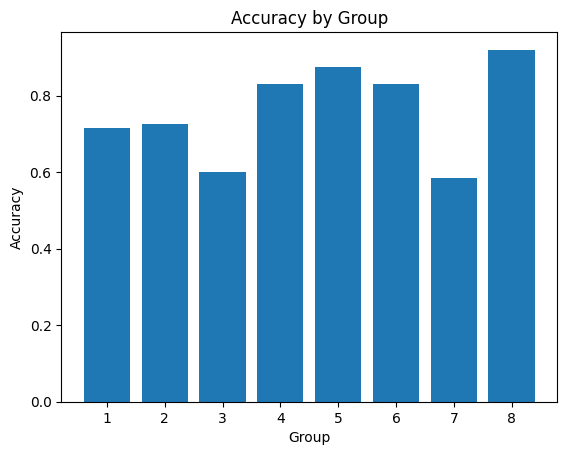

[0.32, 0.36, 0.79, 0.29, 0.515, 0.355, 0.535, 0.695, 0.69, 0.61, 0.8, 0.605, 0.845, 0.66, 0.58, 0.645]


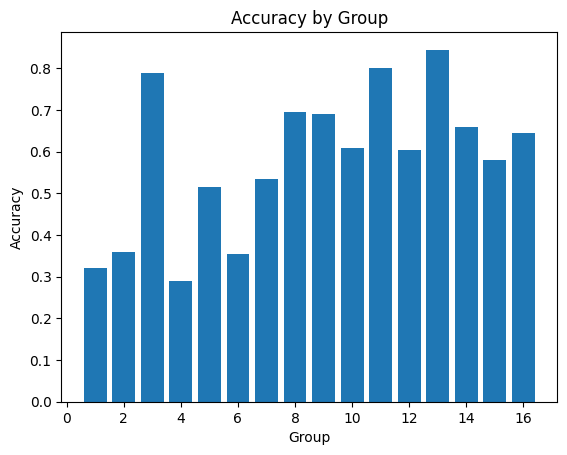

In [14]:

figure1(netflix_8_dt, path = None, name = 'f1_netflix8_Results_DT')
figure1(netflix_16_dt, path = None, name = 'f1_netflix16_Results_DT')

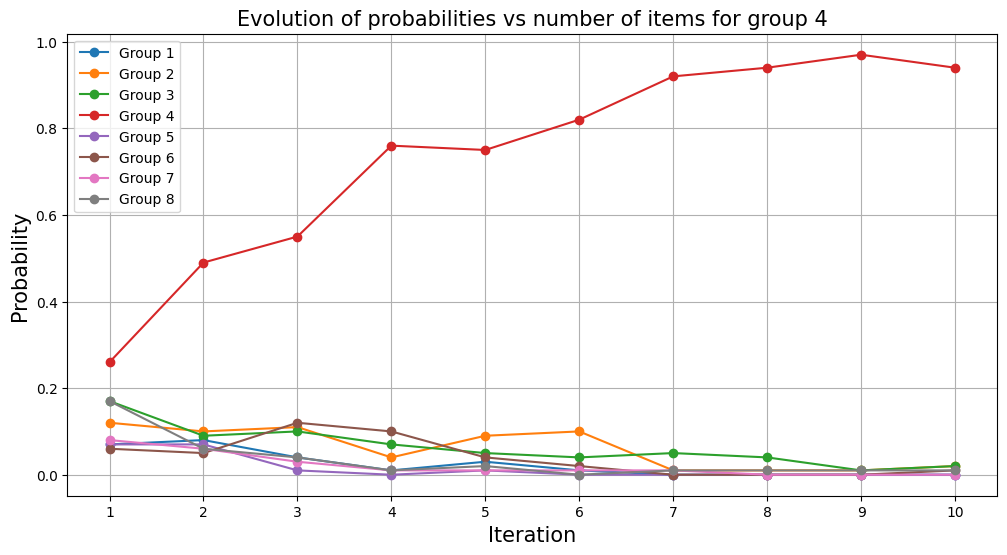

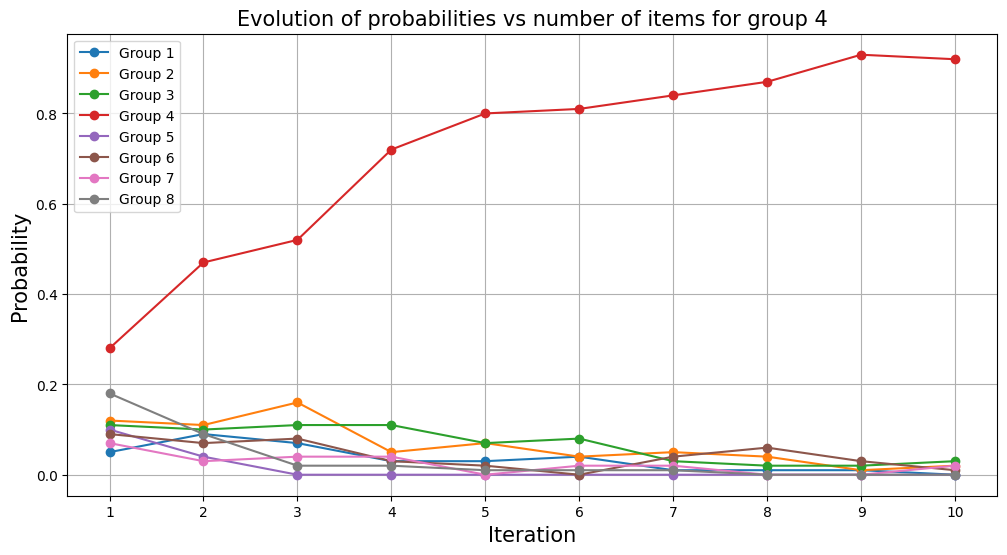

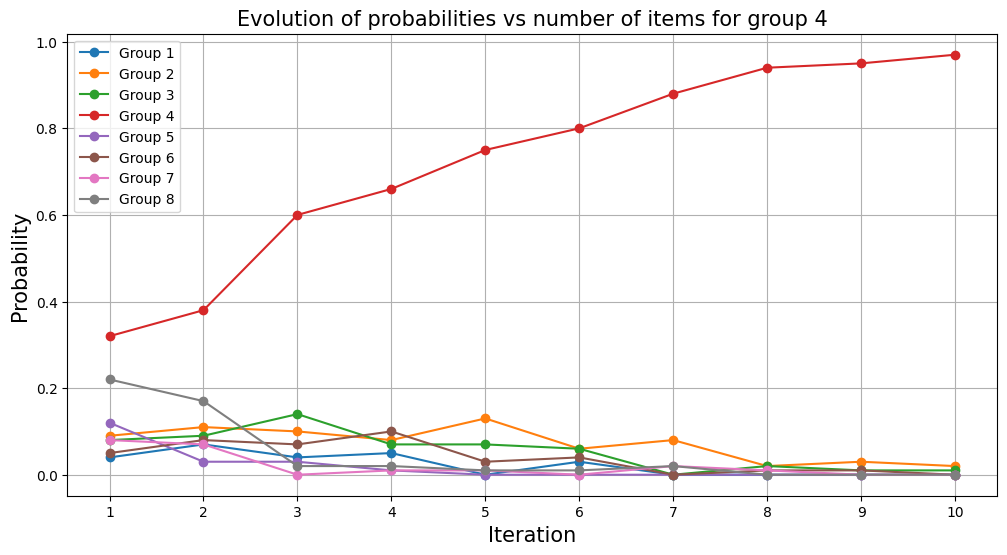

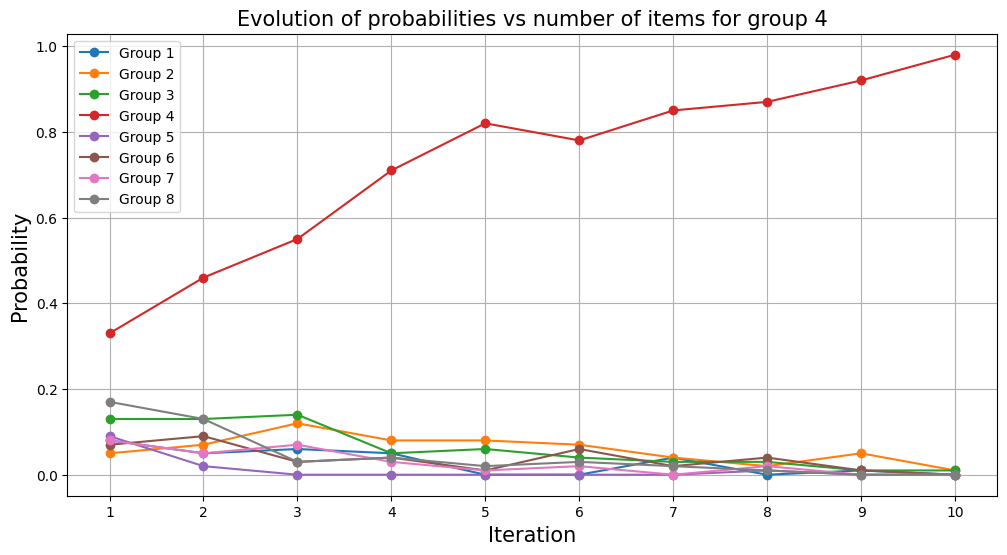

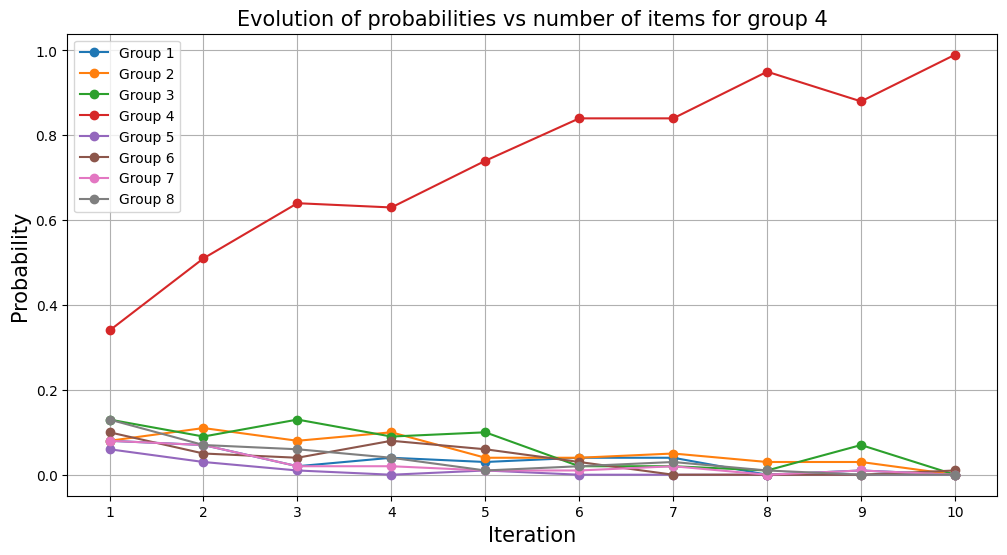

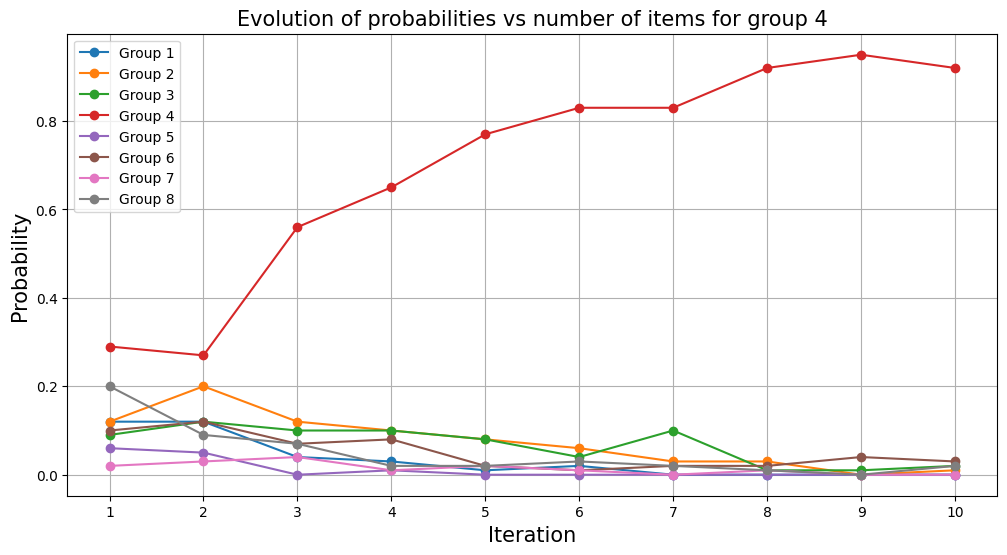

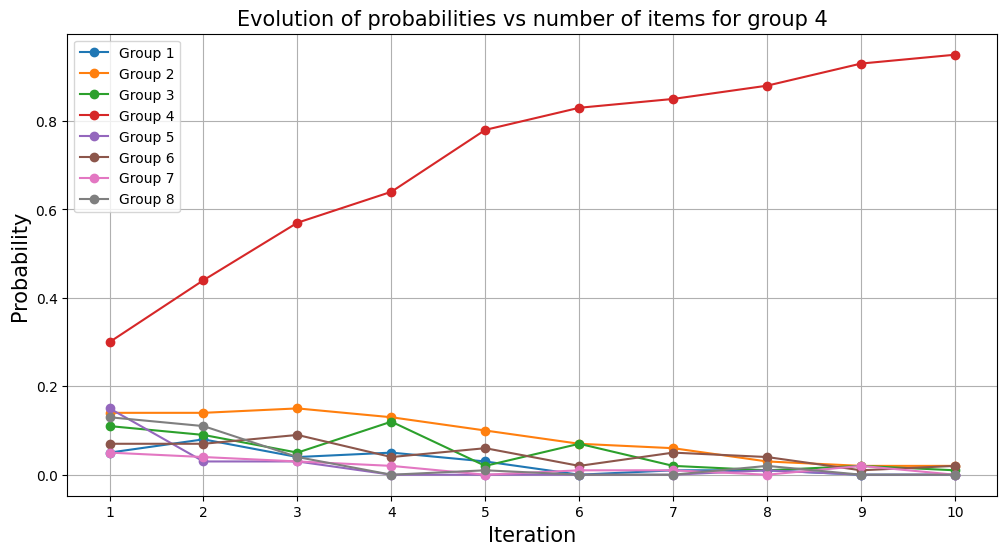

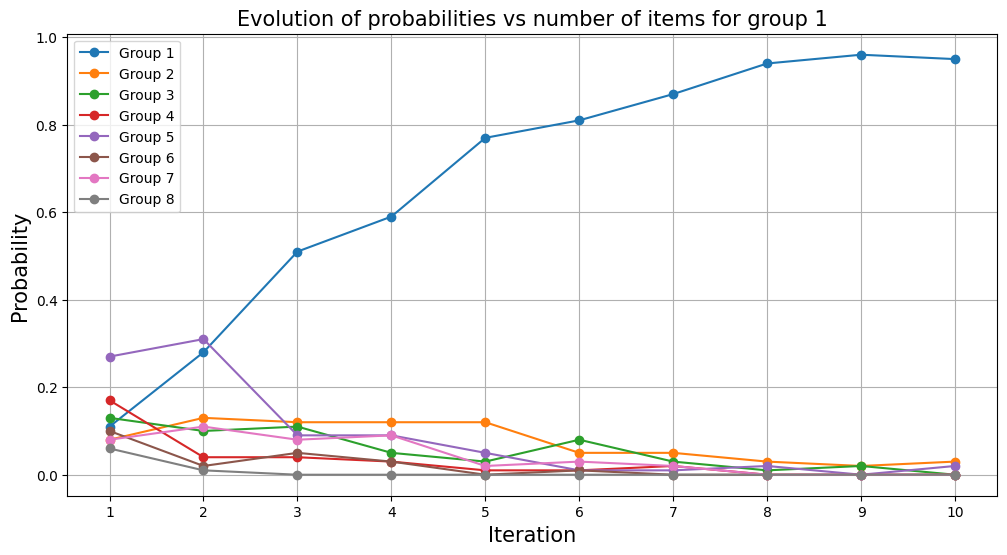

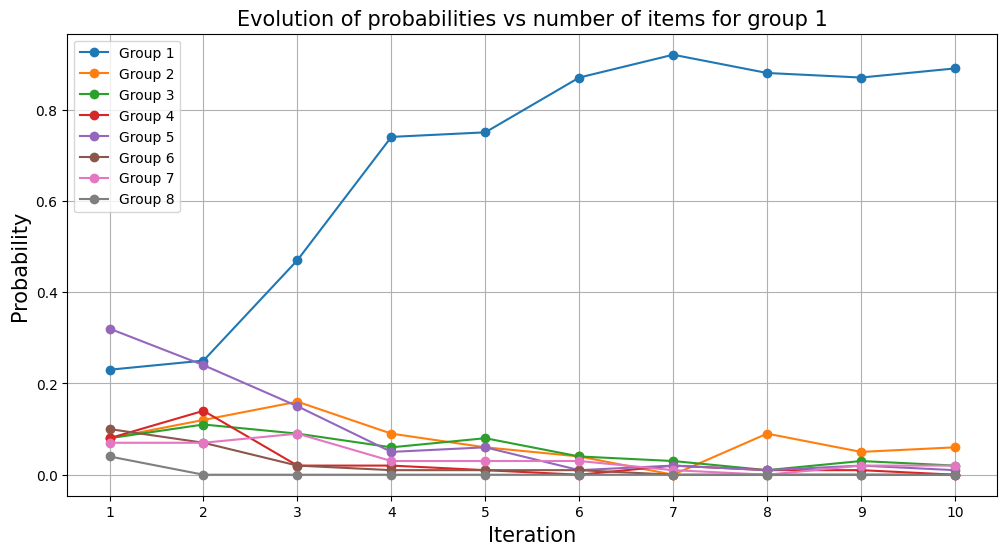

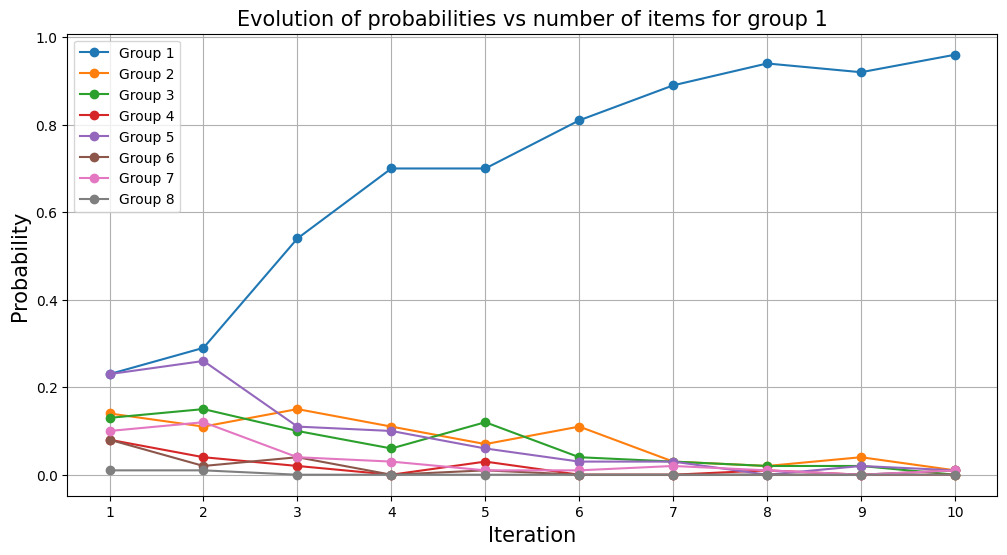

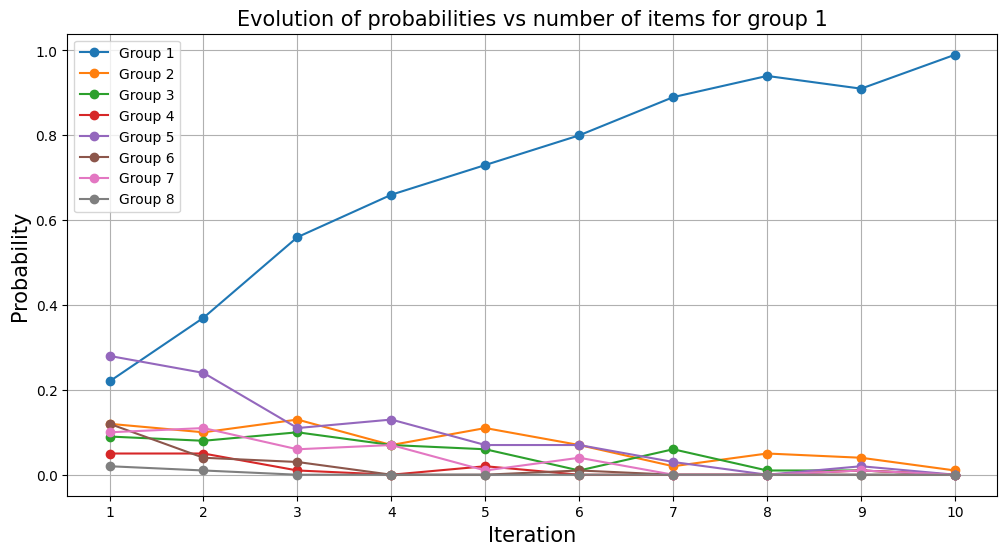

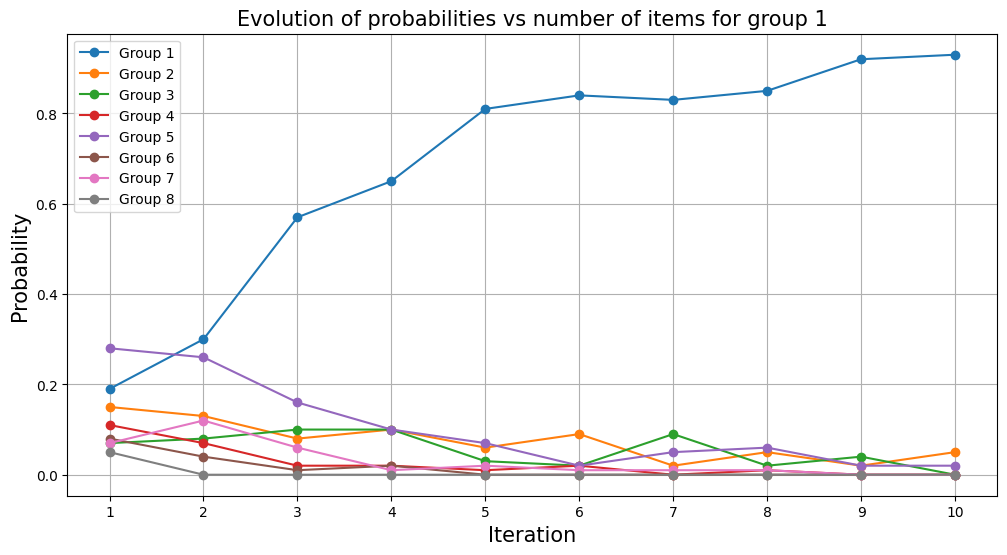

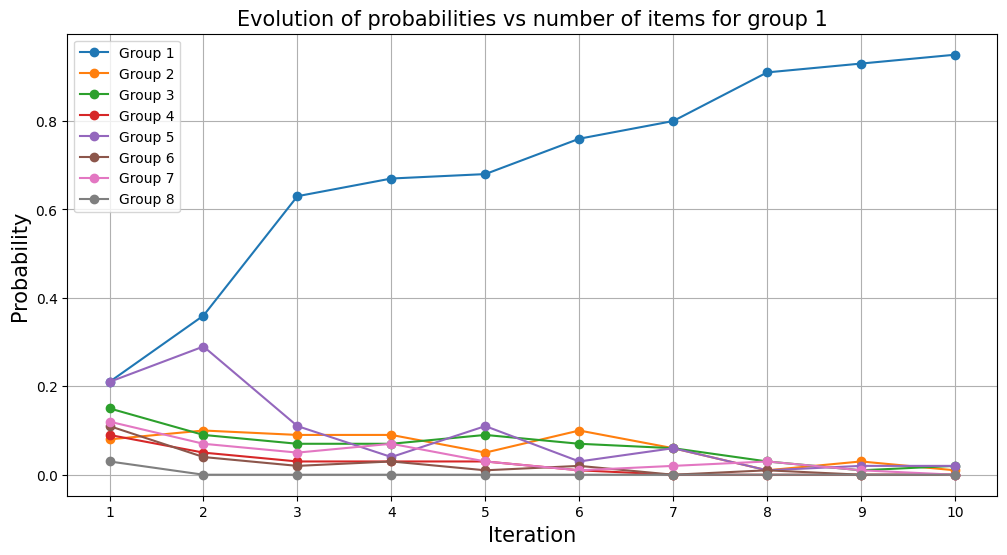

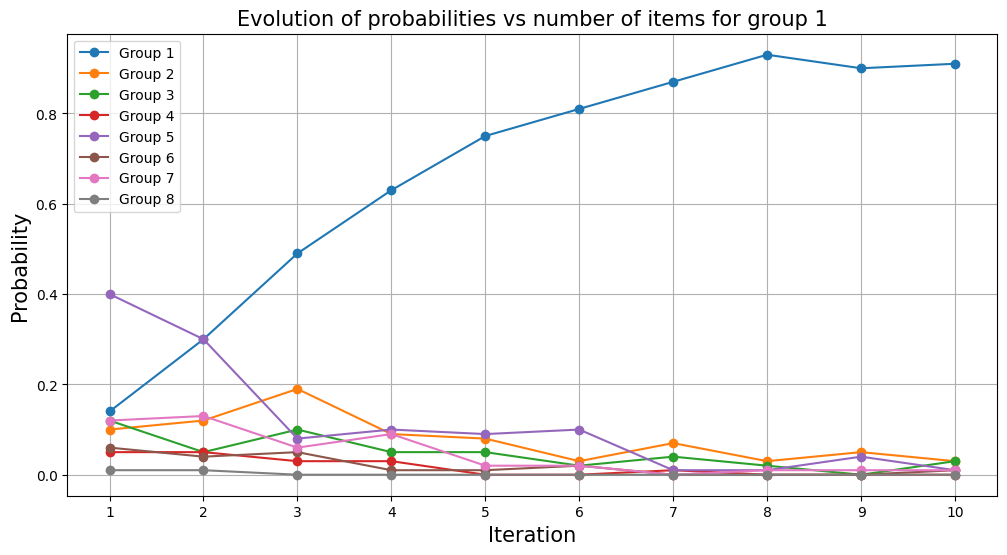

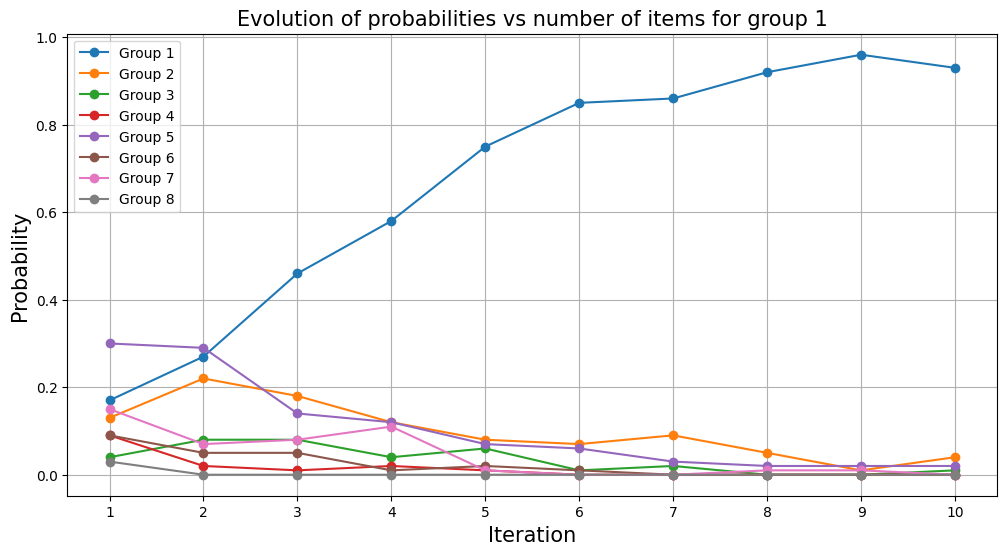

In [ ]:
## Gruppe 4 ##
figure2(netflix8_100_88666223, group = 3, path = None, name = 'f2_netflix8_100_88666223_4')
figure2(netflix8_100_73308559, group = 3, path = None, name = 'f2_netflix8_100_73308559_4')
figure2(netflix8_100_63381133, group = 3, path = None, name = 'f2_netflix8_100_63381133_4')
figure2(netflix8_100_61451749, group = 3, path = None, name = 'f2_netflix8_100_61451749_4')
figure2(netflix8_100_45755797, group = 3, path = None, name = 'f2_netflix8_100_45755797_4')
figure2(netflix8_100_93643757, group = 3, path = None, name = 'f2_netflix8_100_93643757_4')
figure2(netflix8_100_83638859, group = 3, path = None, name = 'f2_netflix8_100_83638859_4')
figure2(netflix8_100_34521869, group = 3, path = None, name = 'f2_netflix8_100_34521869_4')

## Gruppe 1 ##
figure2(netflix8_100_88666223, group = 0, path = None, name = 'f2_netflix8_100_88666223_1')
figure2(netflix8_100_73308559, group = 0, path = None, name = 'f2_netflix8_100_73308559_1')
figure2(netflix8_100_63381133, group = 0, path = None, name = 'f2_netflix8_100_63381133_1')
figure2(netflix8_100_61451749, group = 0, path = None, name = 'f2_netflix8_100_61451749_1')
figure2(netflix8_100_45755797, group = 0, path = None, name = 'f2_netflix8_100_45755797_1')
figure2(netflix8_100_93643757, group = 0, path = None, name = 'f2_netflix8_100_93643757_1')
figure2(netflix8_100_83638859, group = 0, path = None, name = 'f2_netflix8_100_83638859_1')
figure2(netflix8_100_34521869, group = 0, path = None, name = 'f2_netflix8_100_34521869_1')

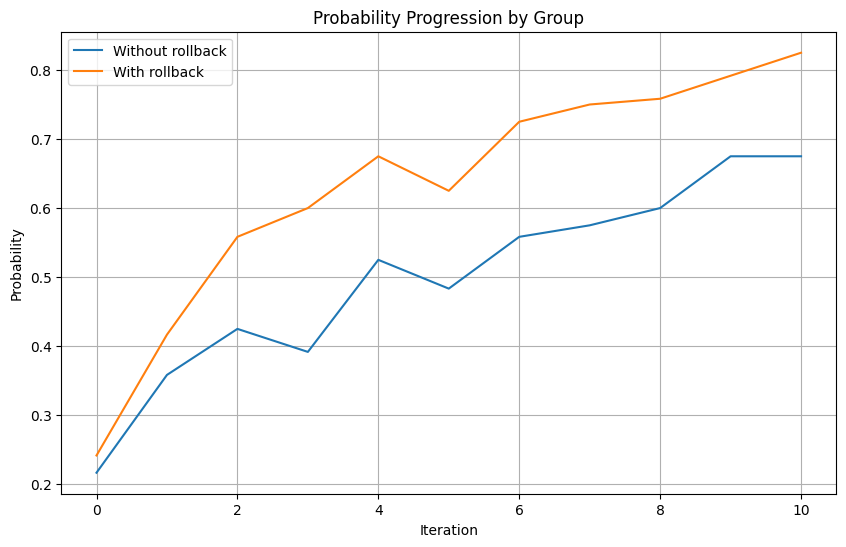

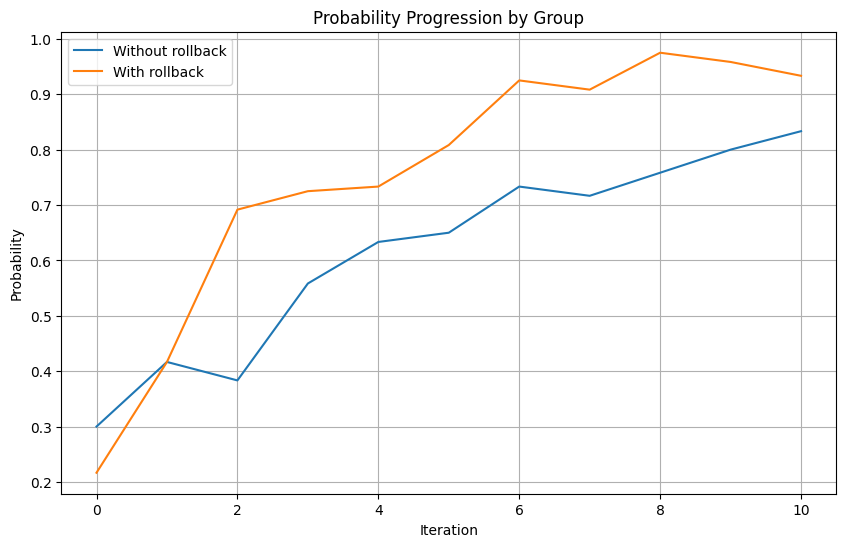

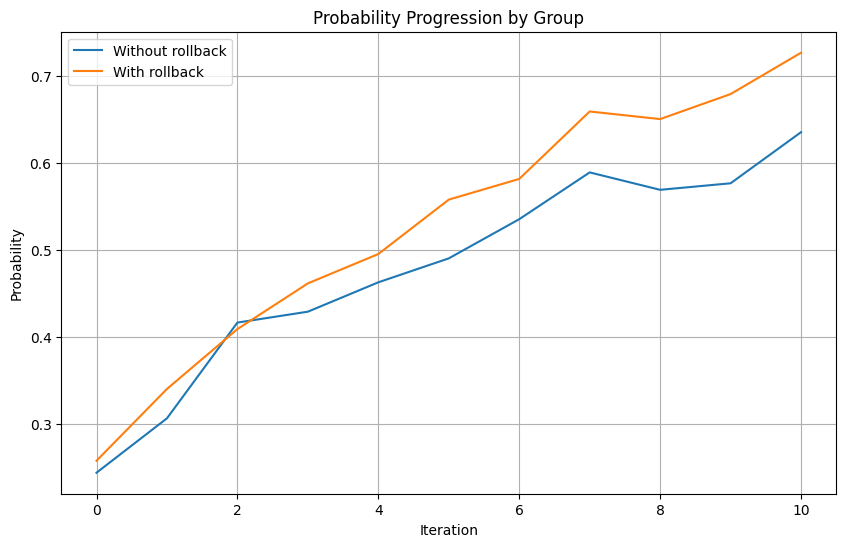

In [16]:
figure3(goodreads8_15_93643757_nr, goodreads8_15_93643757, path = None, name = 'f3_goodreads8')
figure3(netflix8_15_93643757_nr, netflix8_15_93643757, path = None, name = 'f3_netflix8')
figure3(jester8_100__nr, jester8_100_93643757, path = None, name = 'f3_jester8')

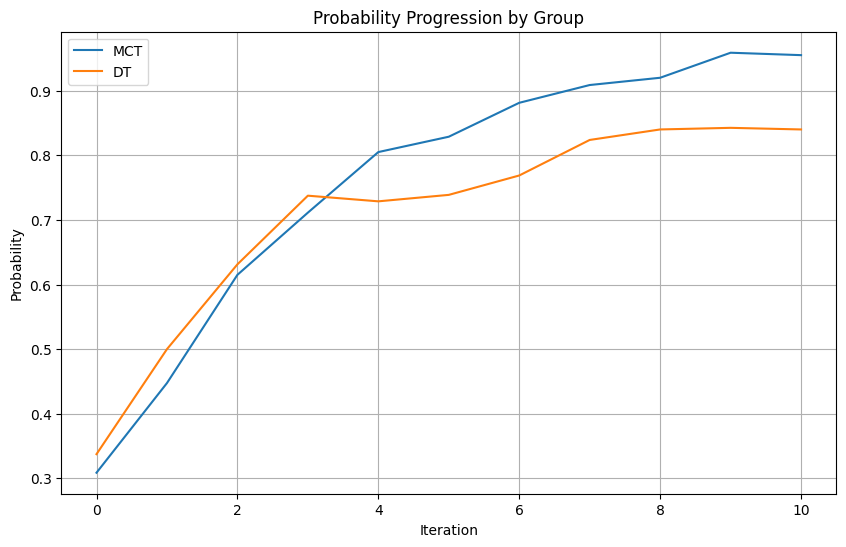

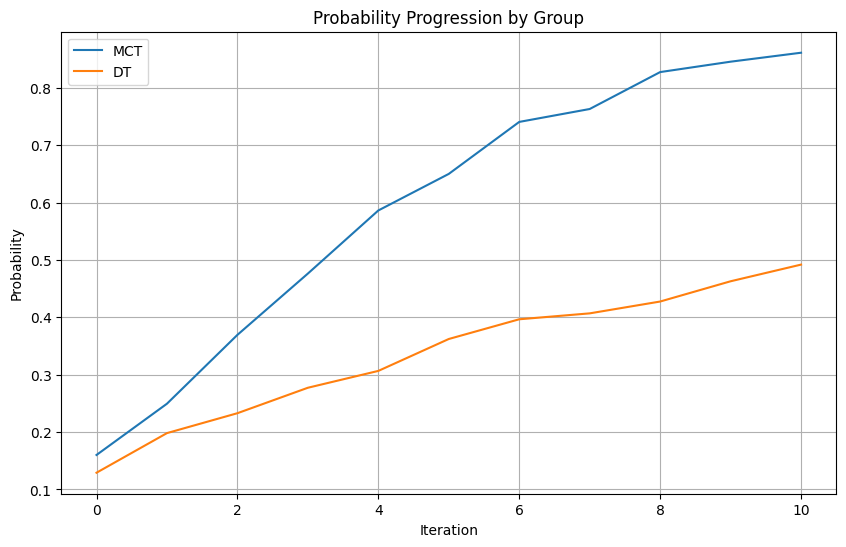

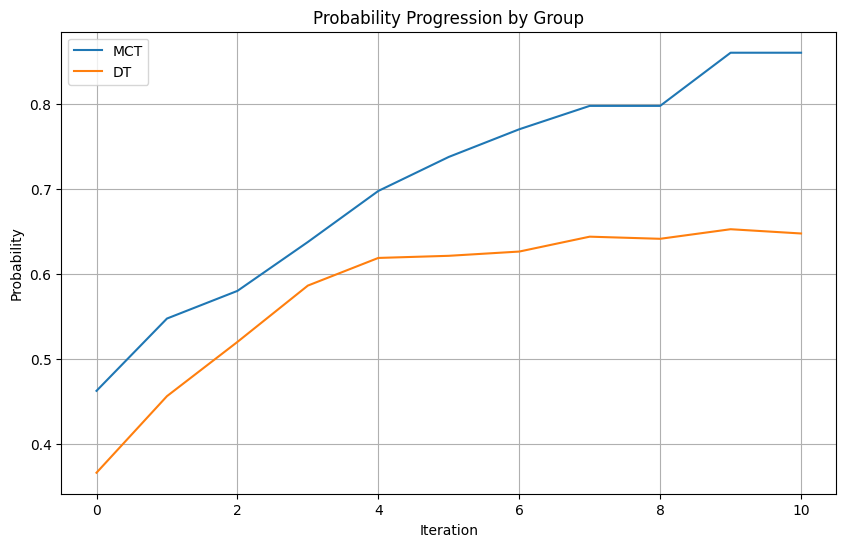

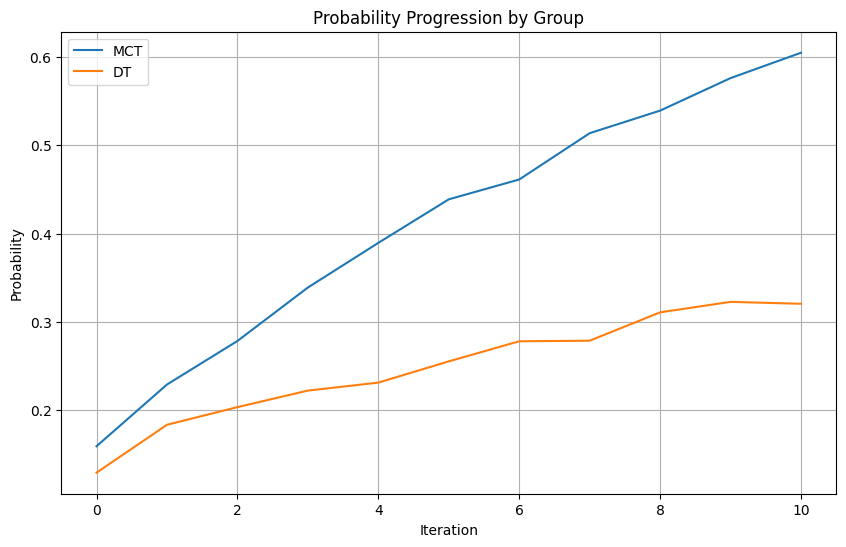

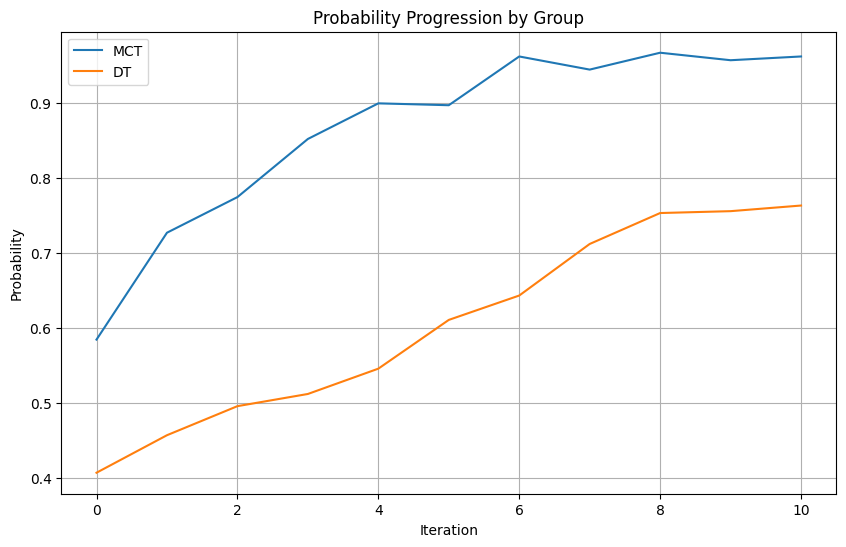

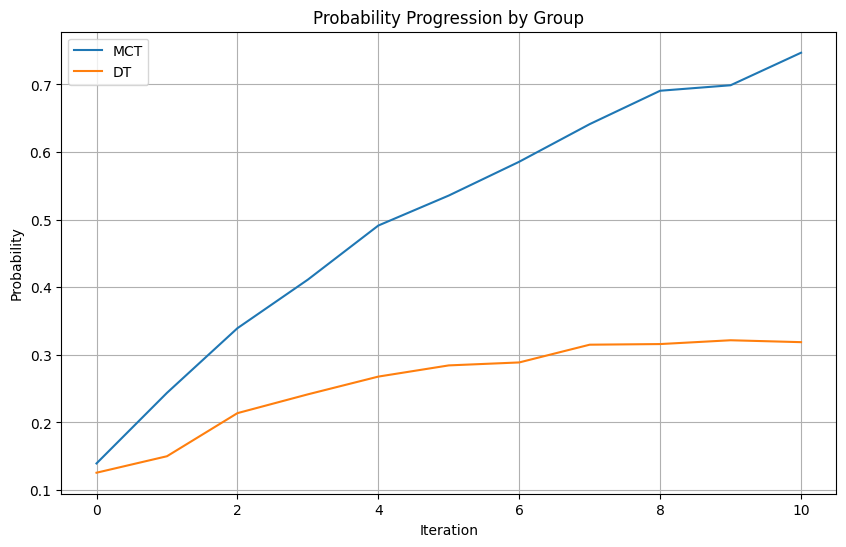

In [17]:
figure4(netflix8_100_61451749, netflix_4_dt, path = None, name = 'f4_netflix8_61451749')
figure4(netflix16_100_61451749, netflix_16_dt, path = None, name = 'f4_netflix16_61451749')
figure4(jester4_100_61451749, jester_4_dt, path = None, name = 'f4_jester4_61451749')
figure4(jester16_100_61451749, jester_16_dt, path = None, name = 'f4_jester16_61451749')
figure4(goodreads4_100_61451749, goodreads_4_dt, path = None, name = 'f4_goodreads4_61451749')
figure4(goodreads16_100_61451749, goodreads_16_dt, path = None, name = 'f4_goodreads16_61451749')

[0.99, 0.99, 0.99, 1.0, 1.0, 1.0, 0.98, 1.0]
[0.715, 0.725, 0.6, 0.83, 0.875, 0.83, 0.585, 0.92]


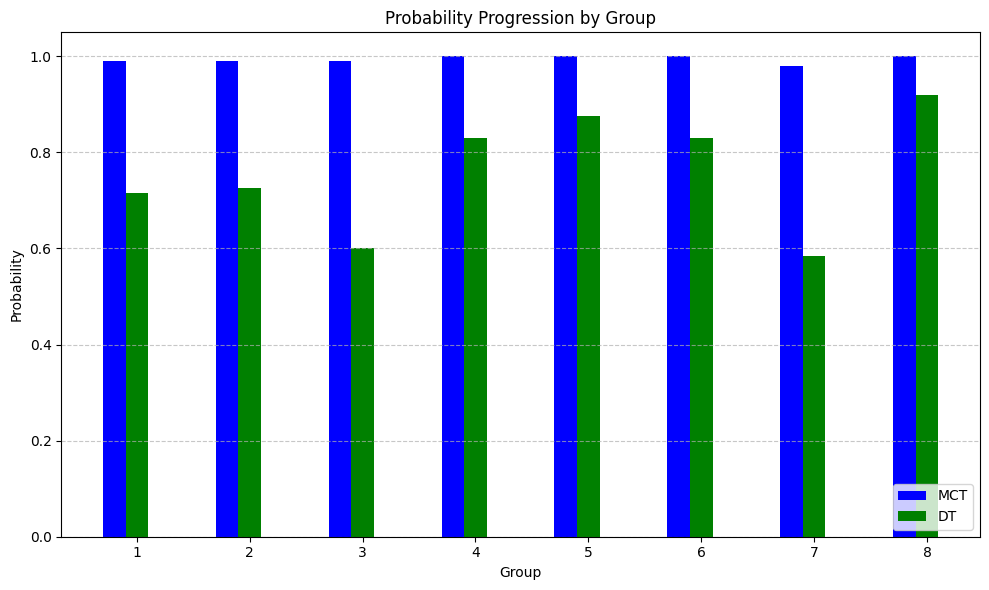

[0.91, 0.95, 1.0, 0.87, 0.98, 0.94, 0.96, 0.98, 0.99, 1.0, 0.99, 0.98, 1.0, 0.96, 0.99, 0.99]
[0.32, 0.36, 0.79, 0.29, 0.515, 0.355, 0.535, 0.695, 0.69, 0.61, 0.8, 0.605, 0.845, 0.66, 0.58, 0.645]


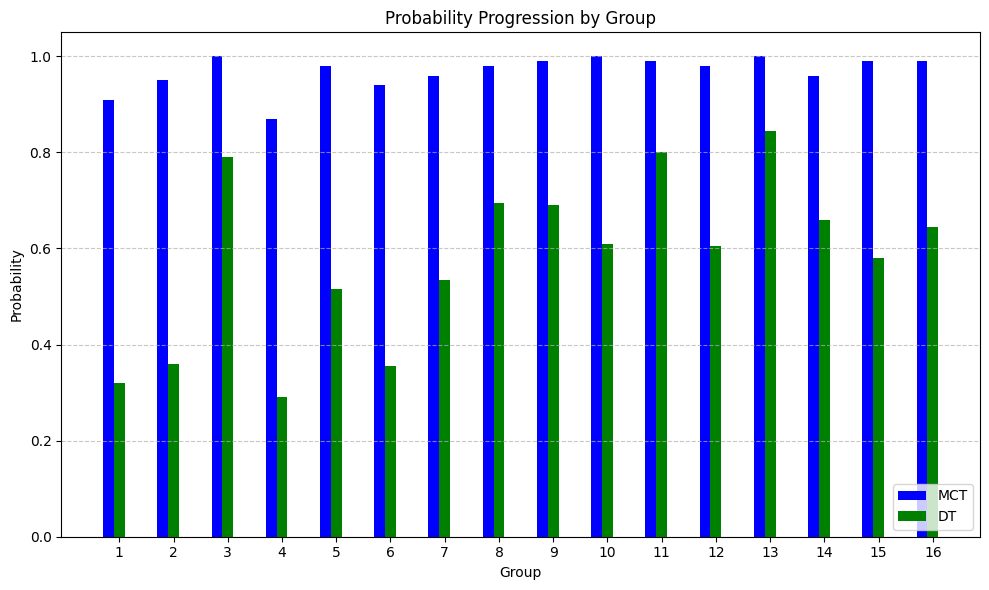

In [18]:
figure5(netflix8_100_61451749, netflix_8_dt, path = None, name = 'netflix8_100_61451749')
figure5(netflix16_100_61451749, netflix_16_dt, path = None, name = 'netflix16_100_61451749')

In [ ]:
figure6(np.array(accuracy_per_iteration(goodreads4_100_61451749)), np.array([0.914, 0.970, 0.987, 0.993, 0.996]),
        np.array(accuracy_per_iteration(goodreads8_100_61451749)), np.array([0.691, 0.817, 0.870, 0.903, 0.928]),
        np.array(accuracy_per_iteration(goodreads16_100_61451749)), np.array([0.552, 0.735, 0.814, 0.860, 0.891]),
        np.array(accuracy_per_iteration(goodreads24_100_61451749)), np.array([0.368, 0.544, 0.647, 0.708, 0.758]),
        title = "Comparison between our implementation and authors implementation", name = "goodreads_all", path = None)

figure6(np.array(accuracy_per_iteration(jester4_100_61451749)), np.array([0.717, 0.842, 0.900, 0.932, 0.951]),
        np.array(accuracy_per_iteration(jester8_100_61451749)), np.array([0.542, 0.701, 0.79, 0.847, 0.883]),
        np.array(accuracy_per_iteration(jester16_100_61451749)), np.array([0.432, 0.600, 0.709, 0.779, 0.828]),
        np.array(accuracy_per_iteration(jester32_100_61451749)), np.array([0.305, 0.494, 0.613, 0.701, 0.761]),
        title = "Comparison between our implementation and authors implementation", name = "jester_all", path = None)

[0.585  0.7275 0.775  0.8525 0.9    0.8975 0.9625 0.945  0.9675 0.9575
 0.9625 0.98   0.98   0.9875 0.9925 0.99   0.99   0.9925 0.9875 0.995
 0.985  0.995  0.9925 0.995  0.995 ]
[0.305   0.4225  0.50375 0.5825  0.64875 0.64625 0.7175  0.765   0.77875
 0.80625 0.81125 0.83875 0.86125 0.8425  0.875   0.87625 0.89125 0.885
 0.8925  0.905   0.8925  0.8975  0.92    0.915   0.92   ]
[0.139375 0.24375  0.339375 0.41125  0.49125  0.535625 0.585625 0.64125
 0.690625 0.69875  0.746875 0.765625 0.77625  0.788125 0.799375 0.805
 0.831875 0.840625 0.84125  0.856875 0.860625 0.86625  0.8575   0.884375
 0.895625]
[0.09541667 0.16416667 0.22458333 0.26916667 0.3425     0.375
 0.42291667 0.45666667 0.49625    0.52875    0.56333333 0.57875
 0.60708333 0.60541667 0.63541667 0.64791667 0.66541667 0.66416667
 0.69958333 0.71083333 0.71291667 0.72166667 0.7275     0.75166667
 0.76541667]
[0.4625 0.5475 0.58   0.6375 0.6975 0.7375 0.77   0.7975 0.7975 0.86
 0.86   0.82   0.8725 0.8825 0.855  0.8825 0.9175 0.

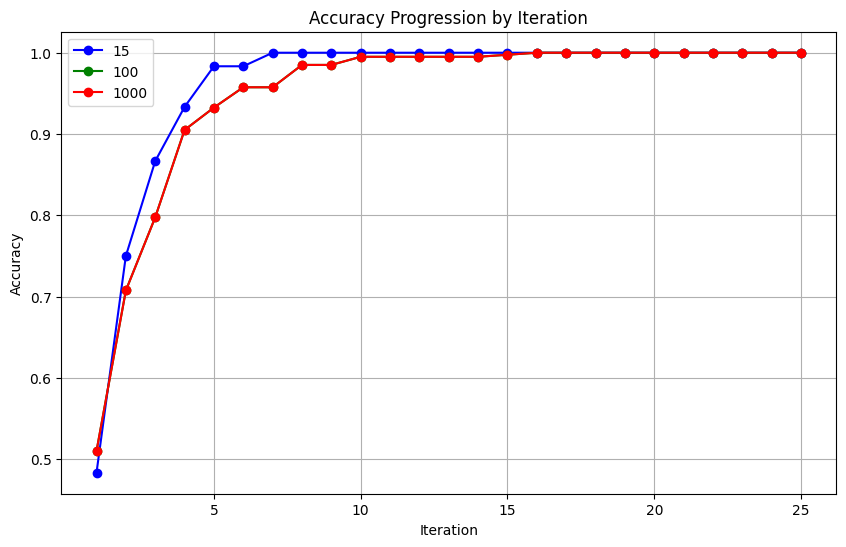

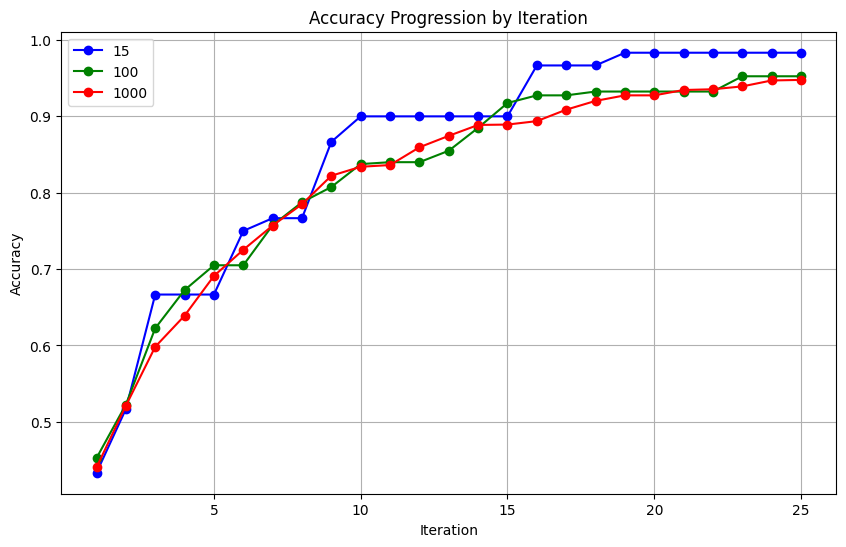

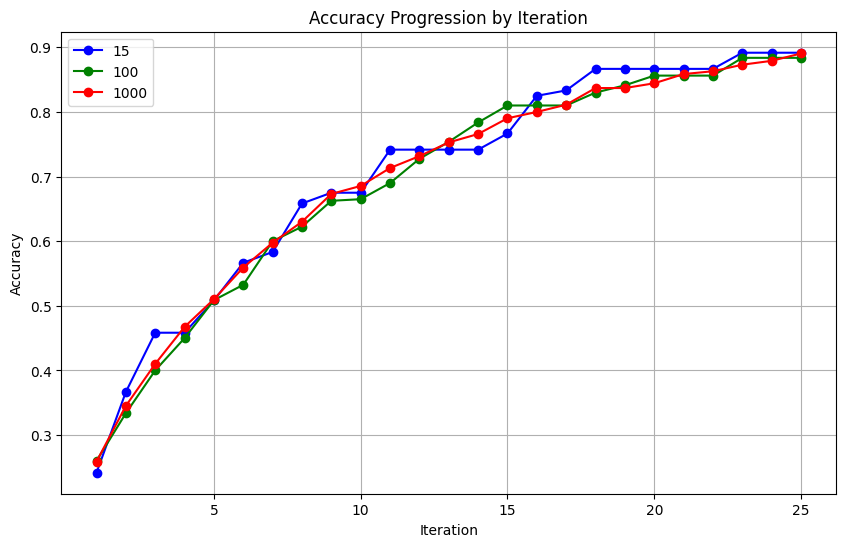

In [20]:
plot_accuracy_by_iteration(netflix4_15_45755797, netflix4_100_45755797, netflix4_1000_45755797, labels=["15", "100", "1000"])
plot_accuracy_by_iteration(jester4_15_45755797, jester4_100_45755797, jester4_1000_45755797, labels=["15", "100", "1000"])
plot_accuracy_by_iteration(jester8_15_45755797, jester8_100_45755797, jester8_1000_45755797, labels=["15", "100", "1000"])